In [1]:
import cv2
import skimage
import matplotlib.pyplot as plt
import numpy as np

In [7]:
def getLBPs(img,show_plot=False):
    lbps = []
    radii = [4, 8, 16, 24, 32]
    for radius in radii:
        lbp = skimage.feature.local_binary_pattern(img,12,radius,'uniform')
        lbps.append(lbp)

    if show_plot:
        fig, axes = plt.subplots(1, 5, figsize=(15, 5))
        for i, (img, label) in enumerate(zip(lbps, radii)):
            axes[i].imshow(img, cmap="gray")
            axes[i].axis('off')
            axes[i].set_title(label)  

        plt.tight_layout()
        plt.show()

    return np.array(lbps)

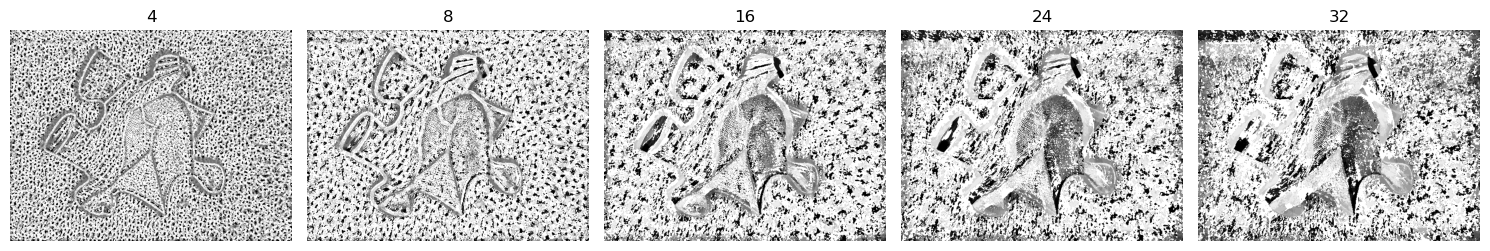

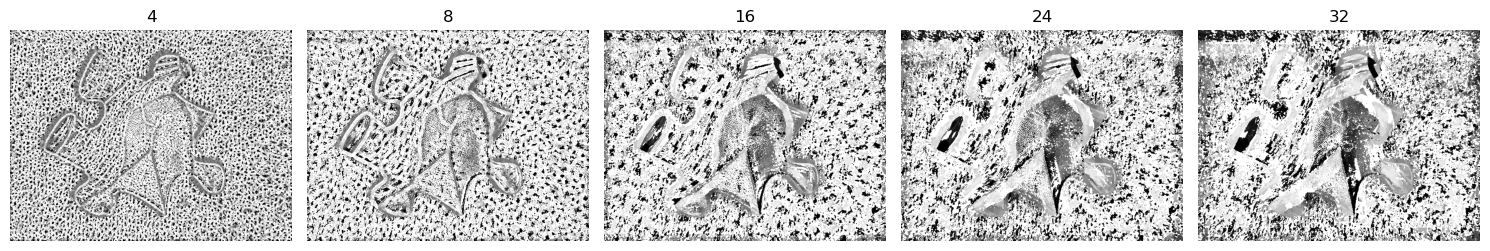

In [8]:
img = cv2.imread('Images/image-35.jpg')
red, green, blue = cv2.split(img)

red_lbps = getLBPs(red,show_plot=True)
green_lbps = getLBPs(green,show_plot=True)
blue_lbps = getLBPs(blue)

In [4]:
def apply_haar_filter(integral_images, filter_size,show_plot=False):
    h, w = integral_images[0].shape
    response = np.zeros((3,h - filter_size, w - filter_size))
    
    for i in range(3):  # For each channel (R, G, B)
        integral_image = integral_images[i]
        
        for y in range(h-filter_size):
            for x in range(w-filter_size):
                A = integral_image[y - filter_size//2, x - filter_size//2]
                B = integral_image[y - filter_size//2, x + filter_size//2]
                C = integral_image[y + filter_size//2, x - filter_size//2]
                D = integral_image[y + filter_size//2, x + filter_size//2]
                
                pos_sum = A + D
                
                neg_sum = B + C
                
                response[i,y - filter_size, x - filter_size] = pos_sum - neg_sum

    if show_plot:
        fig, axes = plt.subplots(1, 3, figsize=(15, 5))
        for i  in range(response.shape[0]):
            axes[i].imshow(response[i].astype(np.uint8), )
            axes[i].axis('off')

        plt.tight_layout()
        plt.show()
                
    return response

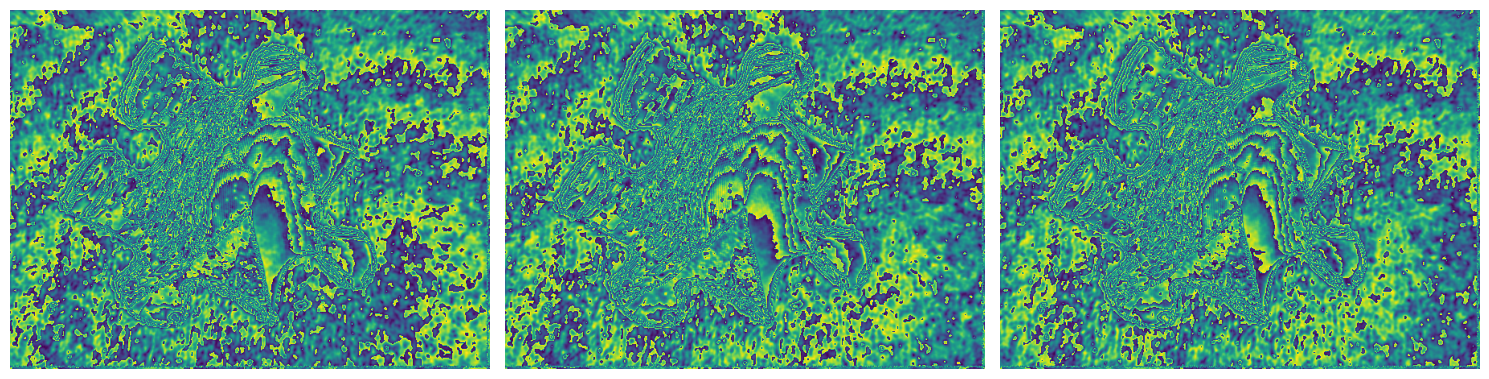

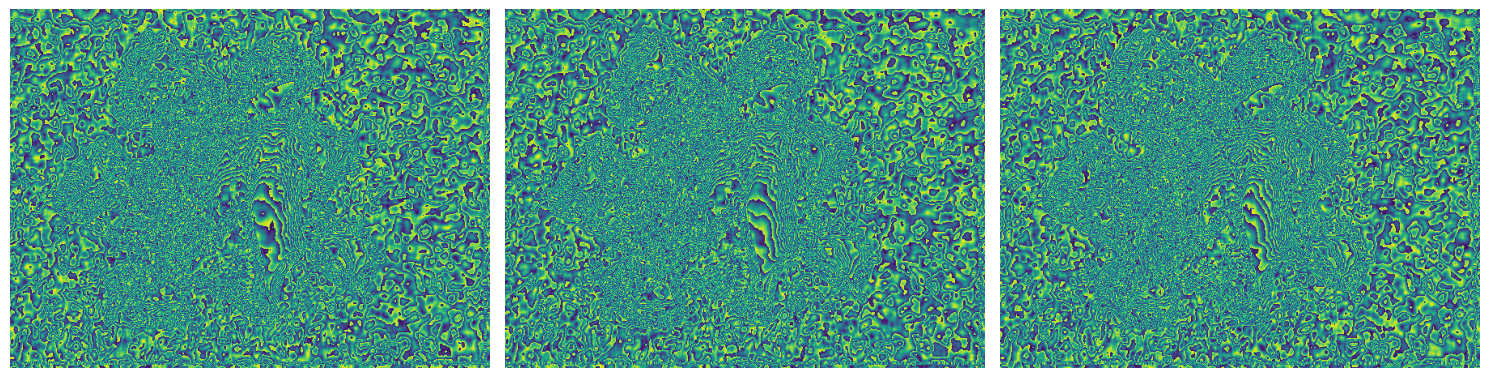

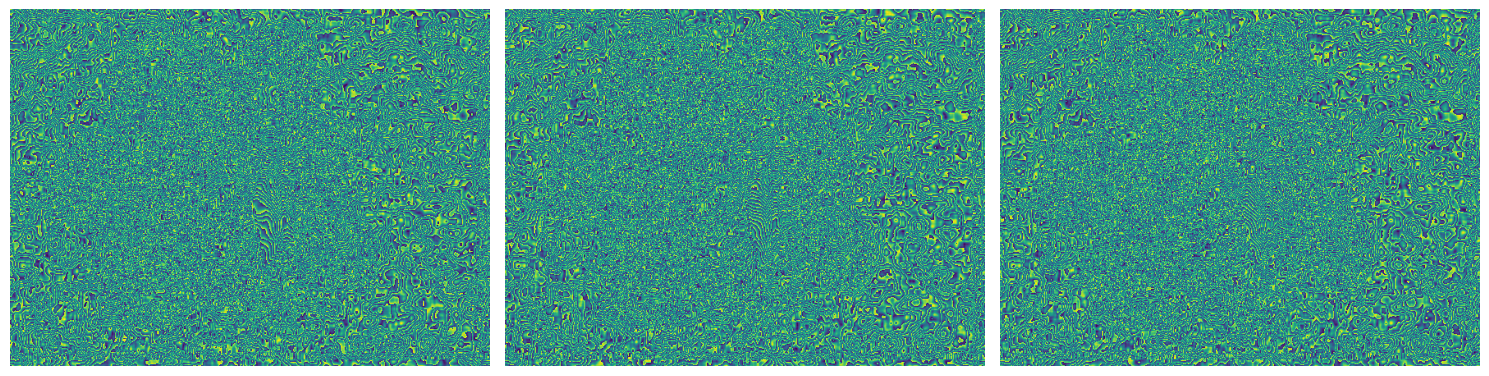

In [5]:
img = cv2.imread('Images/image-35.jpg')
integral_images =[cv2.integral(img[:, :, i]) for i in range(3)]

haar_response4 = apply_haar_filter(integral_images,4,True)
haar_response8 = apply_haar_filter(integral_images,8,True)
haar_response16 = apply_haar_filter(integral_images,16,True)